# Preyecto ML osteoporosis

Importación de librerías

In [40]:
import pandas as pd
import numpy as np
import os

from PIL import Image
from matplotlib.image import imread
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

from tensorflow import keras
from tensorflow.keras import layers


Carga de dataset

In [9]:
dataset = keras.utils.image_dataset_from_directory("data/Osteoporosis_Knee_X_ray")

Found 239 files belonging to 3 classes.


Creación de X e y para entrenamiento de modelos

In [4]:
base = "C:\\Users\\Administrador\\Desktop\\repositorios_agc\\repo_agc\\proyecto_ml\\proyecto_machine_learning_agc"

lista_rutas = []
target = []

rutas = [
    "data/Osteoporosis_Knee_X_ray/normal",
    "data/Osteoporosis_Knee_X_ray/osteopenia",
    "data/Osteoporosis_Knee_X_ray/osteoporosis"
]

for ruta in rutas:
    ruta_total = os.path.join(base, ruta)

    for foto in os.listdir(ruta_total):
        nuevo_nombre = foto.replace("JPEG", "jpg")

        ruta_foto = os.path.join(ruta_total, foto)
        lista_rutas.append(ruta_foto)

        clase_actual = os.path.basename(ruta_total)
        target.append(clase_actual)

print(lista_rutas)
print(len(lista_rutas))
print("*" * 50)
print(target)
print(len(target))

['C:\\Users\\Administrador\\Desktop\\repositorios_agc\\repo_agc\\proyecto_ml\\proyecto_machine_learning_agc\\data/Osteoporosis_Knee_X_ray/normal\\N1.jpg', 'C:\\Users\\Administrador\\Desktop\\repositorios_agc\\repo_agc\\proyecto_ml\\proyecto_machine_learning_agc\\data/Osteoporosis_Knee_X_ray/normal\\N10.jpg', 'C:\\Users\\Administrador\\Desktop\\repositorios_agc\\repo_agc\\proyecto_ml\\proyecto_machine_learning_agc\\data/Osteoporosis_Knee_X_ray/normal\\N11.jpg', 'C:\\Users\\Administrador\\Desktop\\repositorios_agc\\repo_agc\\proyecto_ml\\proyecto_machine_learning_agc\\data/Osteoporosis_Knee_X_ray/normal\\N12.jpg', 'C:\\Users\\Administrador\\Desktop\\repositorios_agc\\repo_agc\\proyecto_ml\\proyecto_machine_learning_agc\\data/Osteoporosis_Knee_X_ray/normal\\N13.jpg', 'C:\\Users\\Administrador\\Desktop\\repositorios_agc\\repo_agc\\proyecto_ml\\proyecto_machine_learning_agc\\data/Osteoporosis_Knee_X_ray/normal\\N14.jpg', 'C:\\Users\\Administrador\\Desktop\\repositorios_agc\\repo_agc\\proyec

In [5]:
df = pd.DataFrame({"path_fotos": lista_rutas, "target": target})
df

,path_fotos,target
0,C:\Users\Administrador\Desktop\repositorios_ag...,normal
1,C:\Users\Administrador\Desktop\repositorios_ag...,normal
2,C:\Users\Administrador\Desktop\repositorios_ag...,normal
3,C:\Users\Administrador\Desktop\repositorios_ag...,normal
4,C:\Users\Administrador\Desktop\repositorios_ag...,normal
...,...,...
234,C:\Users\Administrador\Desktop\repositorios_ag...,osteoporosis
235,C:\Users\Administrador\Desktop\repositorios_ag...,osteoporosis
236,C:\Users\Administrador\Desktop\repositorios_ag...,osteoporosis
237,C:\Users\Administrador\Desktop\repositorios_ag...,osteoporosis


In [43]:
df["target"].value_counts()

target
osteopenia      154
osteoporosis     49
normal           36
Name: count, dtype: int64

In [85]:
lista_fotos_1d = []
lista_fotos_flat = []

for foto in df["path_fotos"]:
    # image = imread(foto)
    img = Image.open(foto).convert("L")
    img_resized = img.resize((64, 64))
    img_array = np.array(img_resized)

    img_array = img_array[..., np.newaxis]
    img_flat = img_array.flatten()

    lista_fotos_1d.append(img_array)
    lista_fotos_flat.append(img_flat)

print(lista_fotos_1d)
print(len(lista_fotos_1d))
print("_" * 50)
print(lista_fotos_flat)
print(len(lista_fotos_flat))

[array([[[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       ...,

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]]], shape=(64, 64, 1), dtype=uint8), array([[[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       ...,

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0

In [86]:
X = np.array(lista_fotos_flat)
X.shape

(239, 4096)

In [87]:
y = df["target"]
y

0            normal
1            normal
2            normal
3            normal
4            normal
           ...     
234    osteoporosis
235    osteoporosis
236    osteoporosis
237    osteoporosis
238    osteoporosis
Name: target, Length: 239, dtype: object

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=11)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(215, 4096)
(215,)
(24, 4096)
(24,)


C:\Users\Administrador\AppData\Local\Temp\ipykernel_9600\2801916547.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  plt.imshow(X_train[0], cmap=plt.cm.get_cmap('Greys'));


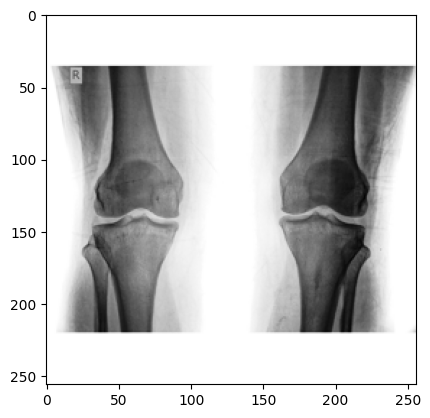

In [31]:
plt.imshow(X_train[0], cmap=plt.cm.get_cmap('Greys'));

## RandomForest

In [89]:
rf = RandomForestClassifier(
    random_state=11,
    class_weight='balanced',
    n_jobs=-1
)

parametros = {
    "n_estimators": [100, 300, 500],        
    "max_depth": [None, 10, 20],  
    # sqrt: Usa la raíz cuadrada del número total de features    
    # #log₂(número_de_features) - ejemplo: log₂(16) = 4      
    "max_features": ["sqrt", "log2"],       
    "max_leaf_nodes": [None, 20]           
}

grid = GridSearchCV(
    rf,
    param_grid=parametros,
    cv=3,                
    scoring="accuracy", 
    verbose=3
)

grid.fit(X_train, y_train)

print("Mejores parámetros:", grid.best_params_)
print("Mejor accuracy:", grid.best_score_)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV 1/3] END max_depth=None, max_features=sqrt, max_leaf_nodes=None, n_estimators=100;, score=0.611 total time=   0.2s
[CV 2/3] END max_depth=None, max_features=sqrt, max_leaf_nodes=None, n_estimators=100;, score=0.653 total time=   0.2s
[CV 3/3] END max_depth=None, max_features=sqrt, max_leaf_nodes=None, n_estimators=100;, score=0.549 total time=   0.2s
[CV 1/3] END max_depth=None, max_features=sqrt, max_leaf_nodes=None, n_estimators=300;, score=0.611 total time=   0.7s
[CV 2/3] END max_depth=None, max_features=sqrt, max_leaf_nodes=None, n_estimators=300;, score=0.653 total time=   0.8s
[CV 3/3] END max_depth=None, max_features=sqrt, max_leaf_nodes=None, n_estimators=300;, score=0.606 total time=   0.6s
[CV 1/3] END max_depth=None, max_features=sqrt, max_leaf_nodes=None, n_estimators=500;, score=0.611 total time=   1.1s
[CV 2/3] END max_depth=None, max_features=sqrt, max_leaf_nodes=None, n_estimators=500;, score=0.653 total

In [90]:
rf_model = RandomForestClassifier(
    n_estimators=300,
    max_depth=10,
    max_features='log2',
    class_weight='balanced', # correción del desbalanceo de clases
    max_leaf_nodes=None,
    random_state=11,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

acc = accuracy_score(y_test, y_pred)

y_pred_proba = rf_model.predict_proba(X_test)

auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')

print("Accuracy: ", round(acc, 4))
print("AUC: ", round(auc, 4))
print("Confusion matrix: ", confusion_matrix(y_test, y_pred))
print("_" * 80)
print("Classification report: ", classification_report(y_test, y_pred))



Accuracy:  0.5833
AUC:  0.6414
Confusion matrix:  [[ 0  3  0]
 [ 0 14  3]
 [ 0  4  0]]
________________________________________________________________________________
Classification report:                precision    recall  f1-score   support

      normal       0.00      0.00      0.00         3
  osteopenia       0.67      0.82      0.74        17
osteoporosis       0.00      0.00      0.00         4

    accuracy                           0.58        24
   macro avg       0.22      0.27      0.25        24
weighted avg       0.47      0.58      0.52        24



c:\Users\Administrador\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Administrador\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Administrador\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this b

<Axes: >

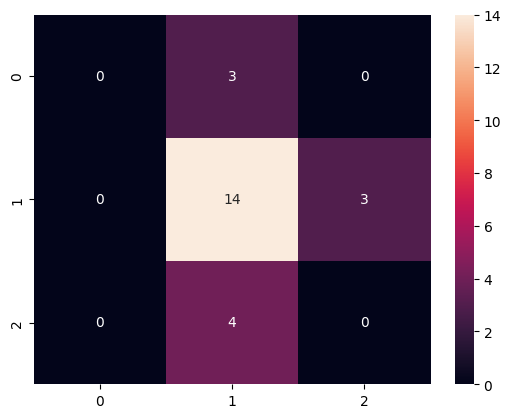

In [91]:
c_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(c_matrix, annot=True)

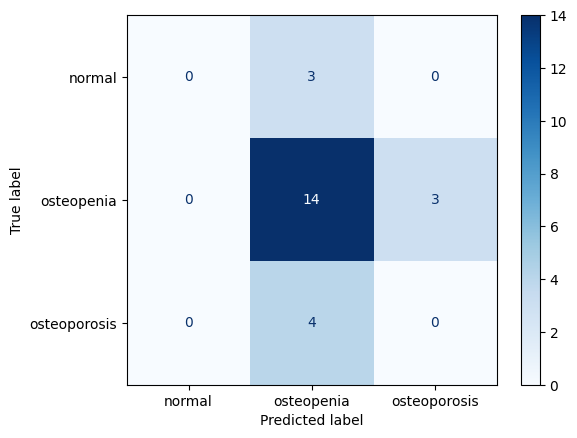

In [65]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["normal", "osteopenia", "osteoporosis"])
disp.plot(cmap='Blues')

## KNN

In [66]:
knn_model = KNeighborsClassifier(n_neighbors=3)

knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)

acc_knn = accuracy_score(y_test, y_pred_knn)

y_pred_proba_knn = knn_model.predict_proba(X_test)

auc_knn = roc_auc_score(y_test, y_pred_proba_knn, multi_class='ovr')

print("Accuracy: ", round(acc_knn, 4))
print("AUC: ", round(auc_knn, 4))
print("Confusion matrix: ", confusion_matrix(y_test, y_pred_knn))
print("_" * 80)
print("Classification report: ", classification_report(y_test, y_pred_knn))


Accuracy:  0.625
AUC:  0.4865
Confusion matrix:  [[ 0  3  0]
 [ 0 14  3]
 [ 0  3  1]]
________________________________________________________________________________
Classification report:                precision    recall  f1-score   support

      normal       0.00      0.00      0.00         3
  osteopenia       0.70      0.82      0.76        17
osteoporosis       0.25      0.25      0.25         4

    accuracy                           0.62        24
   macro avg       0.32      0.36      0.34        24
weighted avg       0.54      0.62      0.58        24



c:\Users\Administrador\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Administrador\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Administrador\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this b

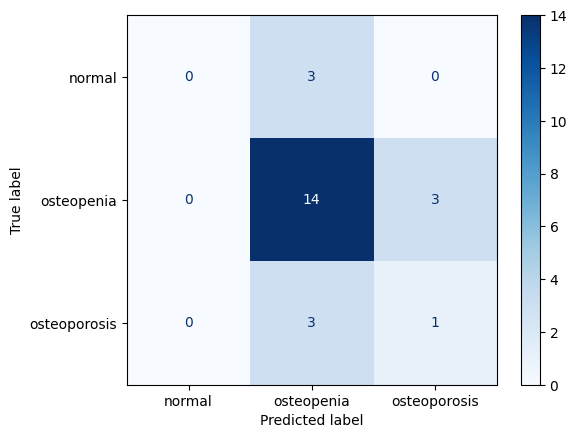

In [67]:
cm_knn = confusion_matrix(y_test, y_pred_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=["normal", "osteopenia", "osteoporosis"])
disp.plot(cmap='Blues')

In [68]:
knn = KNeighborsClassifier()

parametros = {
    "n_neighbors": np.arange(1, 21, 2),  
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "manhattan", "minkowski"],
    "p": [1, 2]         
}

grid_knn = GridSearchCV(
    estimator=knn,
    param_grid=parametros,
    cv=3,                 
    scoring="accuracy",
    verbose=3,
    n_jobs=-1            
)

grid_knn.fit(X_train, y_train)

print("Mejores parámetros:", grid_knn.best_params_)
print("Mejor accuracy:", grid_knn.best_score_)

Fitting 3 folds for each of 120 candidates, totalling 360 fits
Mejores parámetros: {'metric': 'euclidean', 'n_neighbors': np.int64(9), 'p': 1, 'weights': 'distance'}
Mejor accuracy: 0.6371935315597287


In [69]:
knn_model = KNeighborsClassifier(n_neighbors=9, metric="euclidean", p=1, weights="distance")

knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)

acc_knn = accuracy_score(y_test, y_pred_knn)

y_pred_proba_knn = knn_model.predict_proba(X_test)

auc_knn = roc_auc_score(y_test, y_pred_proba_knn, multi_class='ovr')

print("Accuracy: ", round(acc_knn, 4))
print("AUC: ", round(auc_knn, 4))
print("Confusion matrix: ", confusion_matrix(y_test, y_pred_knn))
print("_" * 80)
print("Classification report: ", classification_report(y_test, y_pred_knn))


Accuracy:  0.6667
AUC:  0.5137
Confusion matrix:  [[ 0  3  0]
 [ 0 15  2]
 [ 0  3  1]]
________________________________________________________________________________
Classification report:                precision    recall  f1-score   support

      normal       0.00      0.00      0.00         3
  osteopenia       0.71      0.88      0.79        17
osteoporosis       0.33      0.25      0.29         4

    accuracy                           0.67        24
   macro avg       0.35      0.38      0.36        24
weighted avg       0.56      0.67      0.61        24



c:\Users\Administrador\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Administrador\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Administrador\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this b

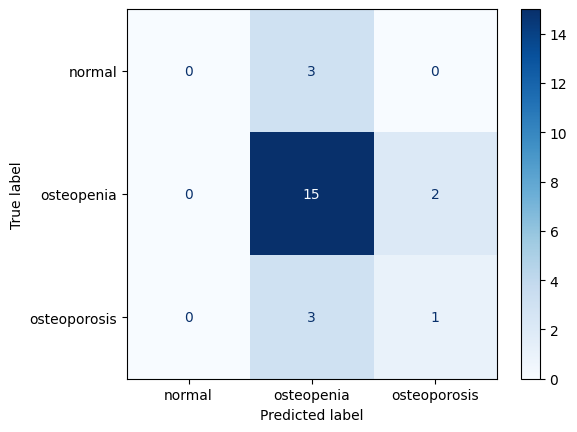

In [70]:
cm_knn = confusion_matrix(y_test, y_pred_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=["normal", "osteopenia", "osteoporosis"])
disp.plot(cmap='Blues')

## Redes neuronales

In [92]:
X_rn = np.array(lista_fotos_1d)
X_rn.shape

(239, 64, 64, 1)

In [93]:
# Normalización de y con One Hot Encoder
encoder = OneHotEncoder()
y_encoded = encoder.fit_transform(df[["target"]]).toarray()

y_encoded


array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1

In [94]:
y_rn = y_encoded
y_rn

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X_rn, y_rn, test_size=0.1, random_state=11)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(215, 64, 64, 1)
(215, 3)
(24, 64, 64, 1)
(24, 3)


C:\Users\Administrador\AppData\Local\Temp\ipykernel_9600\2801916547.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  plt.imshow(X_train[0], cmap=plt.cm.get_cmap('Greys'));


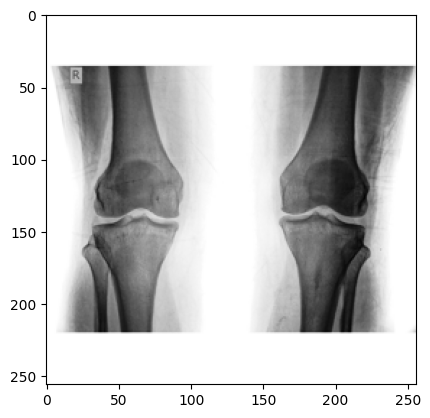

In [30]:
plt.imshow(X_train[0], cmap=plt.cm.get_cmap('Greys'));

### Normalización de los datos

In [75]:
np.max(X_train)

np.uint8(255)

In [76]:
np.min(X_train)

np.uint8(0)

In [96]:
# Normalización de X
X_train = X_train.astype("float32")/255
X_test = X_test.astype("float32")/255

In [78]:
np.max(X_train)

np.float32(1.0)

In [79]:
np.min(X_train)

np.float32(0.0)

In [80]:
np.mean(X_train)

np.float32(0.24039853)

In [97]:
# Normalización de y
y_train = y_train.astype("float32")
y_test = y_test.astype("float32")

In [98]:
X_val = X_train[-24:]
y_val = y_train[-24:]

X_train = X_train[:-24]
y_train = y_train[:-24]

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(191, 64, 64, 1)
(24, 64, 64, 1)
(24, 64, 64, 1)


In [83]:
256*256

65536

In [84]:
X_train.shape

(191, 256, 256, 1)

In [116]:
model = keras.models.Sequential()

# Capa entrada se aplana de una dimension a una, va a tener 784 neuronas (una para cada pixel) 28x28
# cada pixel es como el feature de un dataset
model.add(keras.layers.Flatten(input_shape=(64, 64)))

# Hidden layer
model.add(keras.layers.Dense(units = 32,
                            activation='relu'))

# Hidden layer
model.add(keras.layers.Dense(units = 16,
                            activation='relu'))

# Capa salida
model.add(keras.layers.Dense(units = 3,
                            activation='softmax'))

c:\Users\Administrador\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [117]:
model.compile(
    optimizer = keras.optimizers.Adam(),
    loss = keras.losses.CategoricalCrossentropy(),
    metrics = [keras.metrics.CategoricalAccuracy()]
)


In [118]:
# Summary: devuelve la red neuronal que se ha creado
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 32)             │       131,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 131,683 (514.39 KB)

 Trainable params: 131,683 (514.39 KB)

 Non-trainable params: 0 (0.00 B)

In [119]:
# Entrenamiento
history = model.fit(
    X_train,
    y_train,
    # cuántas muestras se usan para calcular un paso de entrenamiento antes de actualizar los pesos.
    batch_size = 16,
    epochs =30,
    validation_data = (X_val, y_val) # validation_split = 0.1
)

Epoch 1/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - categorical_accuracy: 0.5340 - loss: 1.0068 - val_categorical_accuracy: 0.8333 - val_loss: 0.6471
Epoch 2/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - categorical_accuracy: 0.6126 - loss: 0.9326 - val_categorical_accuracy: 0.8333 - val_loss: 0.6398
Epoch 3/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - categorical_accuracy: 0.6073 - loss: 0.9310 - val_categorical_accuracy: 0.8333 - val_loss: 0.7656
Epoch 4/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - categorical_accuracy: 0.6178 - loss: 0.8916 - val_categorical_accuracy: 0.8333 - val_loss: 0.6435
Epoch 5/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - categorical_accuracy: 0.6178 - loss: 0.8907 - val_categorical_accuracy: 0.8333 - val_loss: 0.6694
Epoch 6/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - categorical_accuracy: 0.6440 - loss: 0.8856 - val_categorical_accuracy: 0.8333 - val_loss: 0.6184
Epoch 7/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - categorical_accuracy: 0.6178 - loss: 0.86

In [111]:
# Reentrenamiento 1
history = model.fit(
    X_train,
    y_train,
    # cuántas muestras se usan para calcular un paso de entrenamiento antes de actualizar los pesos.
    batch_size = 16,
    epochs =30,
    validation_data = (X_val, y_val) # validation_split = 0.1
)

Epoch 1/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - categorical_accuracy: 0.9110 - loss: 0.2916 - val_categorical_accuracy: 0.5833 - val_loss: 0.9259
Epoch 2/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - categorical_accuracy: 0.9058 - loss: 0.2777 - val_categorical_accuracy: 0.7083 - val_loss: 0.8378
Epoch 3/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - categorical_accuracy: 0.9005 - loss: 0.2715 - val_categorical_accuracy: 0.4583 - val_loss: 1.1410
Epoch 4/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - categorical_accuracy: 0.9110 - loss: 0.2808 - val_categorical_accuracy: 0.5833 - val_loss: 0.7781
Epoch 5/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - categorical_accuracy: 0.9058 - loss: 0.2702 - val_categorical_accuracy: 0.5000 - val_loss: 1.3710
Epoch 6/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - categorical_accuracy: 0.9058 - loss: 0.3116 - val_categorical_accuracy: 0.5833 - val_loss: 0.8936
Epoch 7/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - categorical_accuracy: 0.8953 - loss: 0.27

In [120]:
pd.DataFrame(history.history)

,categorical_accuracy,loss,val_categorical_accuracy,val_loss
0,0.534031,1.006774,0.833333,0.647150
1,0.612565,0.932619,0.833333,0.639806
2,0.607330,0.931000,0.833333,0.765628
3,0.617801,0.891627,0.833333,0.643453
4,0.617801,0.890700,0.833333,0.669440
5,0.643979,0.885579,0.833333,0.618403
6,0.617801,0.865425,0.833333,0.661984
7,0.628272,0.844438,0.791667,0.742495
8,0.643979,0.827698,0.791667,0.717465
9,0.654450,0.801366,0.791667,0.668263


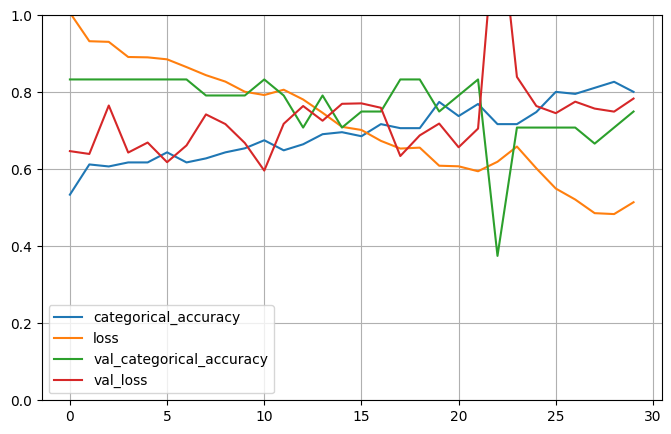

In [121]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show();

In [114]:
results = model.evaluate(X_test, y_test)
results

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - categorical_accuracy: 0.5417 - loss: 1.2537


[1.2537363767623901, 0.5416666865348816]

In [115]:
confusion_matrix(y_test, model.predict(X_test).argmax(axis=1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


ValueError: Classification metrics can't handle a mix of multilabel-indicator and multiclass targets